In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import numpy as np
import csv

# 1) Longitude analysis of leadership (the pred_label column) distribution and trend across 5 projects, across multiple years:
# 2) Within each project, aggregate and analyze the relationship (e.g. scatter plot) between the following metrics:
# •Leadership (the pred_label column) vs. #comment
#  •Leadership (the pred_label column) vs. Avg. comment length (the Word_Count column)
# •Leadership (the pred_label column)  vs. issue open duration (difference between the times of the last comment and the first comment)

In [5]:
#Read excel file 
df = pd.read_excel (r'C:\Users\dana\Desktop\Shared Leadership Google ExploreCSR\prediction_1-bitcoin_closed_comment_data_all.xlsx', engine='openpyxl')
df['time'] = pd.to_datetime(df.time)
df.head()

,comment_ID,issue_no,commenter_ID,commenter,is_author,commenter_type,commenter_role,time,sentiment_list,sentiment,pred_label,comment_content,word_count,has_link
0,777185607,21143,863730,fanquake,NaN,User,MEMBER,2021-02-11 03:43:37+00:00,"[0, 1, 1, 0]",0.500000,IS,"\nThis won't work, because it wont install Boo...",85,NaN
1,776333336,21132,863730,fanquake,NaN,User,MEMBER,2021-02-10 00:14:13+00:00,"[0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, ...",0.529412,NaN,My guess is that you haven't installed all o...,373,Y
2,776416162,21132,863730,fanquake,NaN,User,MEMBER,2021-02-10 03:37:02+00:00,"[0, 1]",0.500000,IS,"Well if you need BDB wallet support, you shoul...",38,NaN
3,776528540,21132,6399679,MarcoFalke,NaN,User,MEMBER,2021-02-10 08:18:30+00:00,"[1, 1, 1, 0]",0.750000,IS,You'll need to follow the instructions that we...,33,Y
4,776536714,21132,2415484,jonatack,NaN,User,MEMBER,2021-02-10 08:34:28+00:00,[2],2.000000,NaN,Here is a guide that may be helpful:\nhttps://...,10,Y


In [6]:
df.dtypes

comment_ID                       int64
issue_no                         int64
commenter_ID                     int64
commenter                       object
is_author                      float64
commenter_type                  object
commenter_role                  object
time               datetime64[ns, UTC]
sentiment_list                  object
sentiment                      float64
pred_label                      object
comment_content                 object
word_count                       int64
has_link                        object
dtype: object

In [7]:
df.describe()

,comment_ID,issue_no,commenter_ID,is_author,sentiment,word_count
count,2.012000e+04,20120.000000,2.012000e+04,0.0,20109.000000,20120.000000
mean,2.656191e+08,8808.905318,3.891682e+06,NaN,0.659977,52.443340
std,2.200744e+08,5760.100731,7.650389e+06,NaN,0.438973,100.808776
min,6.243880e+05,1.000000,1.087000e+03,NaN,0.000000,0.000000
25%,4.246340e+07,3757.000000,1.784640e+05,NaN,0.400000,15.000000
50%,2.477189e+08,7905.000000,8.637300e+05,NaN,0.666667,31.000000
75%,4.328559e+08,13427.000000,6.248816e+06,NaN,1.000000,59.000000
max,7.778067e+08,21143.000000,7.498073e+07,NaN,2.000000,3532.000000


In [8]:
pd.to_datetime(df.time)

0       2021-02-11 03:43:37+00:00
1       2021-02-10 00:14:13+00:00
2       2021-02-10 03:37:02+00:00
3       2021-02-10 08:18:30+00:00
4       2021-02-10 08:34:28+00:00
                   ...           
20115   2013-04-26 05:58:36+00:00
20116   2013-04-26 09:28:41+00:00
20117   2011-02-07 13:43:11+00:00
20118   2011-04-07 11:43:38+00:00
20119   2011-09-15 12:35:03+00:00
Name: time, Length: 20120, dtype: datetime64[ns, UTC]

In [9]:
df['pred_label'].isnull().value_counts()

True     12051
False     8069
Name: pred_label, dtype: int64

In [10]:
df.cov()

,comment_ID,issue_no,commenter_ID,is_author,sentiment,word_count
comment_ID,4.843274e+16,1.187645e+12,6.526821e+14,NaN,5.238797e+06,3.231950e+08
issue_no,1.187645e+12,3.317876e+07,1.537457e+10,NaN,1.320599e+02,1.018220e+04
commenter_ID,6.526821e+14,1.537457e+10,5.852845e+13,NaN,2.116696e+05,8.431204e+06
is_author,NaN,NaN,NaN,NaN,NaN,NaN
sentiment,5.238797e+06,1.320599e+02,2.116696e+05,NaN,1.926970e-01,-5.740871e-01
word_count,3.231950e+08,1.018220e+04,8.431204e+06,NaN,-5.740871e-01,1.016241e+04


In [11]:
#  •Leadership (the pred_label column) vs. Avg. comment length (the Word_Count column)
df['pred_label'] = df['pred_label'].fillna('')

In [12]:
df['pred_label'].value_counts()

       12051
SC6     2978
IS      1499
SC1     1474
SC7     1125
SC4      807
SC5      186
Name: pred_label, dtype: int64

In [13]:
df.head()

,comment_ID,issue_no,commenter_ID,commenter,is_author,commenter_type,commenter_role,time,sentiment_list,sentiment,pred_label,comment_content,word_count,has_link
0,777185607,21143,863730,fanquake,NaN,User,MEMBER,2021-02-11 03:43:37+00:00,"[0, 1, 1, 0]",0.500000,IS,"\nThis won't work, because it wont install Boo...",85,NaN
1,776333336,21132,863730,fanquake,NaN,User,MEMBER,2021-02-10 00:14:13+00:00,"[0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, ...",0.529412,,My guess is that you haven't installed all o...,373,Y
2,776416162,21132,863730,fanquake,NaN,User,MEMBER,2021-02-10 03:37:02+00:00,"[0, 1]",0.500000,IS,"Well if you need BDB wallet support, you shoul...",38,NaN
3,776528540,21132,6399679,MarcoFalke,NaN,User,MEMBER,2021-02-10 08:18:30+00:00,"[1, 1, 1, 0]",0.750000,IS,You'll need to follow the instructions that we...,33,Y
4,776536714,21132,2415484,jonatack,NaN,User,MEMBER,2021-02-10 08:34:28+00:00,[2],2.000000,,Here is a guide that may be helpful:\nhttps://...,10,Y


In [14]:
df.corr(method ='pearson')

,comment_ID,issue_no,commenter_ID,is_author,sentiment,word_count
comment_ID,1.000000,0.936887,0.387658,NaN,0.054229,0.014568
issue_no,0.936887,1.000000,0.348891,NaN,0.052230,0.017535
commenter_ID,0.387658,0.348891,1.000000,NaN,0.063058,0.010932
is_author,NaN,NaN,NaN,NaN,NaN,NaN
sentiment,0.054229,0.052230,0.063058,NaN,1.000000,-0.012970
word_count,0.014568,0.017535,0.010932,NaN,-0.012970,1.000000


In [15]:
df.corr(method ='spearman')

,comment_ID,issue_no,commenter_ID,is_author,sentiment,word_count
comment_ID,1.000000,0.947099,0.407061,NaN,0.056623,-0.022516
issue_no,0.947099,1.000000,0.375010,NaN,0.052523,-0.014373
commenter_ID,0.407061,0.375010,1.000000,NaN,0.063632,-0.052921
is_author,NaN,NaN,NaN,NaN,NaN,NaN
sentiment,0.056623,0.052523,0.063632,NaN,1.000000,-0.165370
word_count,-0.022516,-0.014373,-0.052921,NaN,-0.165370,1.000000


<AxesSubplot:xlabel='time', ylabel='comment_ID'>

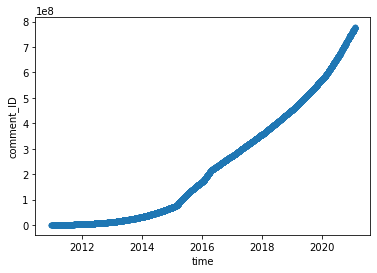

In [16]:
df.plot.scatter(x='time',y='comment_ID')

<AxesSubplot:xlabel='issue_no'>

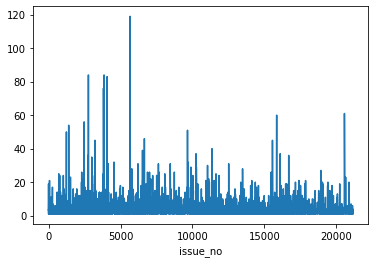

In [17]:
df.groupby(by='issue_no').count().word_count.plot()

In [18]:
df['pred_label'].unique()

array(['IS', '', 'SC6', 'SC4', 'SC7', 'SC1', 'SC5'], dtype=object)

In [19]:
df.comment_content.str.len()

0         394.0
1        1982.0
2         172.0
3         262.0
4         118.0
          ...  
20115     132.0
20116      12.0
20117     168.0
20118     350.0
20119      36.0
Name: comment_content, Length: 20120, dtype: float64

In [20]:
df['comment_length'] = df.comment_content.str.len()

In [21]:
df.head()
df

,comment_ID,issue_no,commenter_ID,commenter,is_author,commenter_type,commenter_role,time,sentiment_list,sentiment,pred_label,comment_content,word_count,has_link,comment_length
0,777185607,21143,863730,fanquake,NaN,User,MEMBER,2021-02-11 03:43:37+00:00,"[0, 1, 1, 0]",0.500000,IS,"\nThis won't work, because it wont install Boo...",85,NaN,394.0
1,776333336,21132,863730,fanquake,NaN,User,MEMBER,2021-02-10 00:14:13+00:00,"[0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, ...",0.529412,,My guess is that you haven't installed all o...,373,Y,1982.0
2,776416162,21132,863730,fanquake,NaN,User,MEMBER,2021-02-10 03:37:02+00:00,"[0, 1]",0.500000,IS,"Well if you need BDB wallet support, you shoul...",38,NaN,172.0
3,776528540,21132,6399679,MarcoFalke,NaN,User,MEMBER,2021-02-10 08:18:30+00:00,"[1, 1, 1, 0]",0.750000,IS,You'll need to follow the instructions that we...,33,Y,262.0
4,776536714,21132,2415484,jonatack,NaN,User,MEMBER,2021-02-10 08:34:28+00:00,[2],2.000000,,Here is a guide that may be helpful:\nhttps://...,10,Y,118.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20115,17056871,2,494411,jgarzik,NaN,User,CONTRIBUTOR,2013-04-26 05:58:36+00:00,"[0, 2]",1.000000,,I think this issue is too vague and outside th...,27,NaN,132.0
20116,17063592,2,1419649,Diapolo,NaN,User,NONE,2013-04-26 09:28:41+00:00,[1],1.000000,,@jgarzik ACK,2,NaN,12.0
20117,745944,1,485723,rasos,NaN,User,NONE,2011-02-07 13:43:11+00:00,"[2, 1, 1]",1.333333,SC1,"Yes, very important. If we enable mobile devic...",32,Y,168.0
20118,968464,1,150349,thiloplanz,NaN,User,NONE,2011-04-07 11:43:38+00:00,"[0, 1, 1]",0.666667,IS,"""Submit signed transactions to the network""\nI...",71,NaN,350.0


In [22]:
average_comment_length = df.groupby('pred_label')['comment_length'].mean().to_frame().reset_index()

<AxesSubplot:xlabel='pred_label', ylabel='comment_length'>

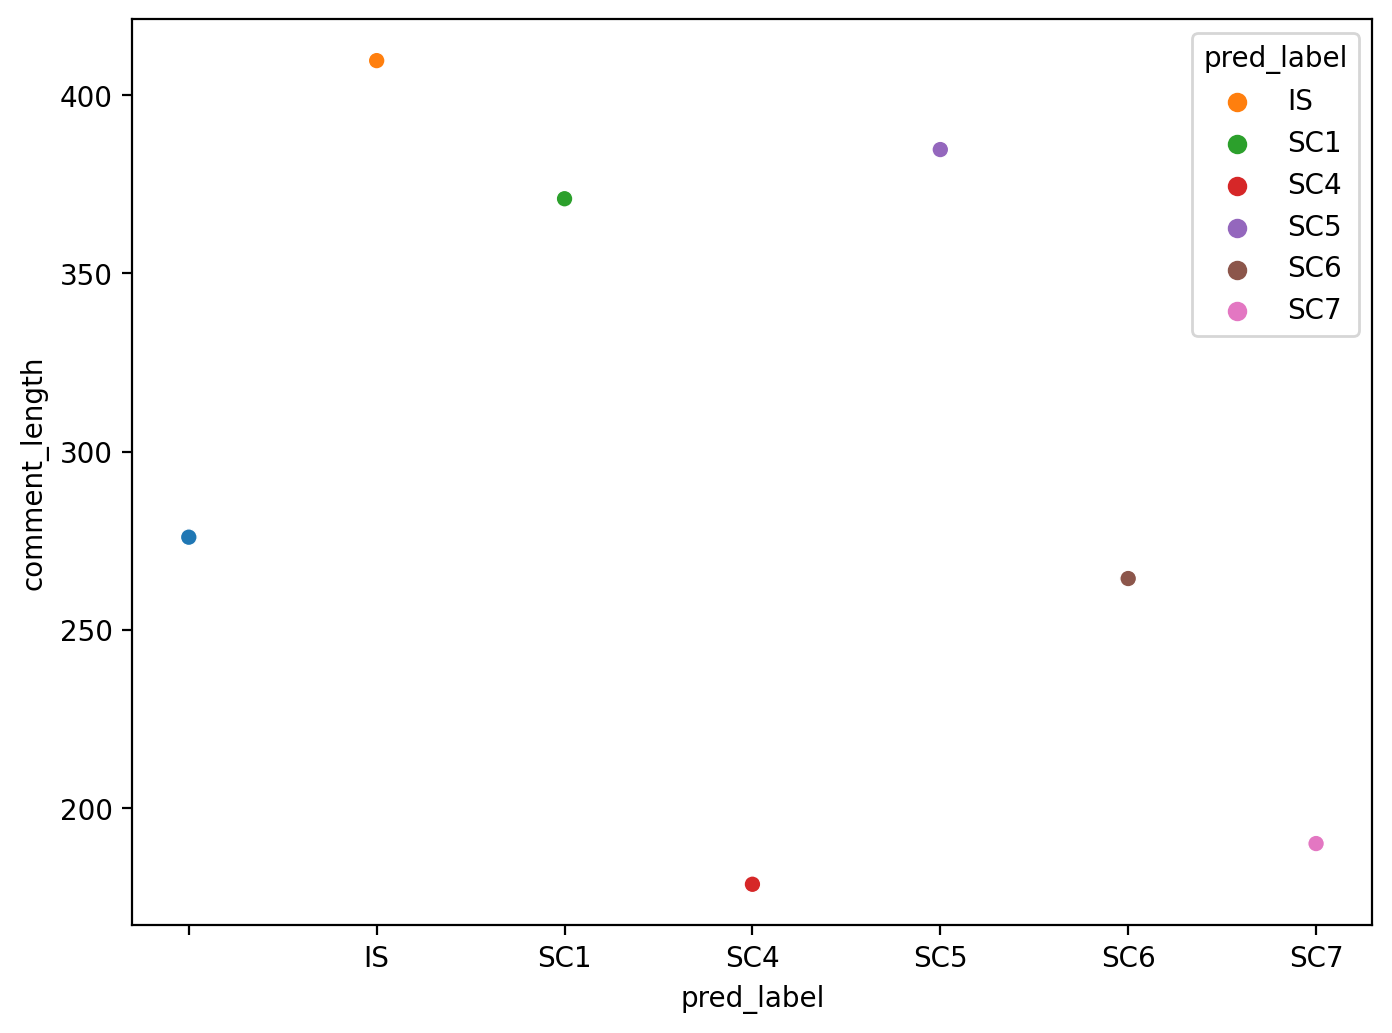

In [23]:
fig, ax = plt.subplots(figsize=(8, 6), dpi=200)
sns.scatterplot(data= average_comment_length, x='pred_label', y='comment_length', ax=ax, hue = 'pred_label')

In [24]:
df['pred_label'].value_counts()

       12051
SC6     2978
IS      1499
SC1     1474
SC7     1125
SC4      807
SC5      186
Name: pred_label, dtype: int64

In [25]:
df['commenter'].value_counts()

laanwj            3499
MarcoFalke        2238
sipa              1494
jonasschnelli      918
Diapolo            739
                  ... 
xaya                 1
richardsj            1
erikdubbelboer       1
bitaussie            1
RCasatta             1
Name: commenter, Length: 1674, dtype: int64

In [26]:
df_grouped = df.groupby(by='pred_label').mean()

In [27]:
df_grouped.describe()

,comment_ID,issue_no,commenter_ID,is_author,sentiment,word_count,comment_length
count,7.000000e+00,7.000000,7.000000e+00,0.0,7.000000,7.000000,7.000000
mean,2.859086e+08,9235.248812,3.957661e+06,NaN,0.700007,55.518613,296.329144
std,3.430809e+07,1009.056549,1.214015e+06,NaN,0.062777,18.512502,93.813402
min,2.571816e+08,8082.887111,2.627067e+06,NaN,0.628064,32.842627,178.620818
25%,2.585390e+08,8689.412571,3.226515e+06,NaN,0.652501,42.583923,227.208895
50%,2.719369e+08,8889.856951,3.936517e+06,NaN,0.670556,51.270987,275.981397
75%,3.089466e+08,9767.769637,4.161992e+06,NaN,0.761002,70.286157,377.813116
max,3.372703e+08,10759.633209,6.363030e+06,NaN,0.774420,78.776518,409.657772


<AxesSubplot:xlabel='pred_label'>

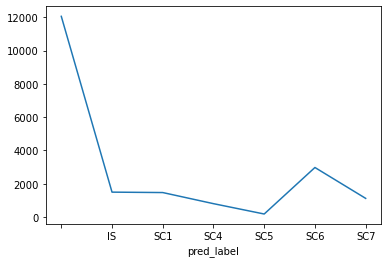

In [28]:
df.groupby(by='pred_label').count()['comment_ID'].plot()

<AxesSubplot:xlabel='pred_label'>

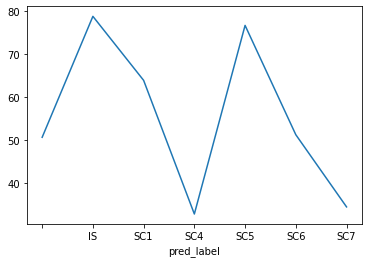

In [29]:
df.groupby(by='pred_label').mean()['word_count'].plot()

In [30]:
df.groupby(by='issue_no')

In [31]:
time_df = pd.DataFrame(data = {'issue_no': df['issue_no'], 'pred_label': df['pred_label'], 'time': df['time']})
time_df.head()
#df.groupby(['issue_list'], axis=0, as_index=True).sum()
time_df

,issue_no,pred_label,time
0,21143,IS,2021-02-11 03:43:37+00:00
1,21132,,2021-02-10 00:14:13+00:00
2,21132,IS,2021-02-10 03:37:02+00:00
3,21132,IS,2021-02-10 08:18:30+00:00
4,21132,,2021-02-10 08:34:28+00:00
...,...,...,...
20115,2,,2013-04-26 05:58:36+00:00
20116,2,,2013-04-26 09:28:41+00:00
20117,1,SC1,2011-02-07 13:43:11+00:00
20118,1,IS,2011-04-07 11:43:38+00:00


In [32]:
time_df['pred_label'].isnull().value_counts()

False    20120
Name: pred_label, dtype: int64

In [33]:
time_df['pred_label'] = time_df['pred_label'].fillna('NAN')

In [34]:
time_df['pred_label'].value_counts()

       12051
SC6     2978
IS      1499
SC1     1474
SC7     1125
SC4      807
SC5      186
Name: pred_label, dtype: int64

In [35]:
time_df.columns
time_df = time_df.groupby(['issue_no']).agg(date_open_issue=pd.NamedAgg(column='time',aggfunc='min'), date_close_issue=pd.NamedAgg(column='time', aggfunc='max'),pred_label=pd.NamedAgg(column='pred_label', aggfunc='first'))
time_df['issue_lifespan'] = time_df['date_close_issue'] - time_df['date_open_issue']

In [36]:
time_df

,date_open_issue,date_close_issue,pred_label,issue_lifespan
issue_no,,,,
1,2011-02-07 13:43:11+00:00,2011-09-15 12:35:03+00:00,SC1,219 days 22:51:52
2,2010-12-20 19:01:12+00:00,2013-04-26 09:28:41+00:00,,857 days 14:27:29
3,2011-01-13 23:08:58+00:00,2020-07-10 00:56:16+00:00,,3465 days 01:47:18
4,2010-12-20 13:54:43+00:00,2010-12-20 13:54:43+00:00,SC6,0 days 00:00:00
5,2011-02-06 01:25:53+00:00,2011-02-13 07:02:48+00:00,,7 days 05:36:55
...,...,...,...,...
21118,2021-02-08 16:24:40+00:00,2021-02-08 16:24:40+00:00,SC4,0 days 00:00:00
21122,2021-02-10 07:54:04+00:00,2021-02-10 07:56:31+00:00,,0 days 00:02:27
21131,2021-02-09 20:41:23+00:00,2021-02-10 08:17:08+00:00,,0 days 11:35:45


In [37]:
time_df['issue_lifespan'].isnull().value_counts()

False    4772
Name: issue_lifespan, dtype: int64

In [38]:
time_df['issue_lifespan'] = time_df['issue_lifespan'].astype('timedelta64[D]')

In [39]:
time_df['issue_lifespan'] = time_df['issue_lifespan'].astype('timedelta64[D]') / np.timedelta64(1, 'D')

In [40]:
time_df

,date_open_issue,date_close_issue,pred_label,issue_lifespan
issue_no,,,,
1,2011-02-07 13:43:11+00:00,2011-09-15 12:35:03+00:00,SC1,219.0
2,2010-12-20 19:01:12+00:00,2013-04-26 09:28:41+00:00,,857.0
3,2011-01-13 23:08:58+00:00,2020-07-10 00:56:16+00:00,,3465.0
4,2010-12-20 13:54:43+00:00,2010-12-20 13:54:43+00:00,SC6,0.0
5,2011-02-06 01:25:53+00:00,2011-02-13 07:02:48+00:00,,7.0
...,...,...,...,...
21118,2021-02-08 16:24:40+00:00,2021-02-08 16:24:40+00:00,SC4,0.0
21122,2021-02-10 07:54:04+00:00,2021-02-10 07:56:31+00:00,,0.0
21131,2021-02-09 20:41:23+00:00,2021-02-10 08:17:08+00:00,,0.0


In [41]:
average_time_elapsed = time_df.groupby('pred_label')['issue_lifespan'].mean().to_frame().reset_index()

In [42]:
# fig, ax = plt.subplots(figsize=(8, 6), dpi=200)
# sns.scatterplot(data = 'average_time_elapsed', x='pred_label', y='issue_lifespan', ax=ax, hue = 'pred_label')

<AxesSubplot:xlabel='issue_no'>

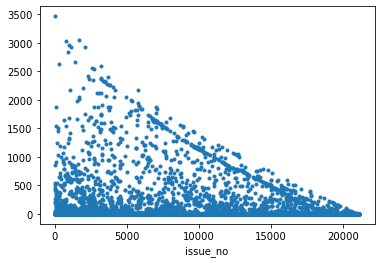

In [43]:
time_df['issue_lifespan'] = time_df['issue_lifespan'].astype('timedelta64[D]') / np.timedelta64(1, 'D')
time_df['issue_lifespan'].plot(style='.')

In [44]:
time_df[time_df['pred_label'].isnull()]

,date_open_issue,date_close_issue,pred_label,issue_lifespan
issue_no,,,,


<AxesSubplot:xlabel='issue_no'>

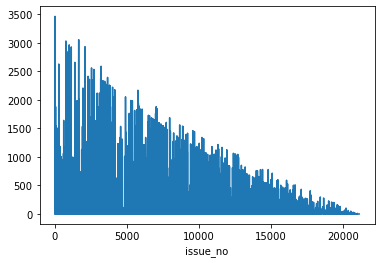

In [45]:
time_df['issue_lifespan'].plot()

<AxesSubplot:xlabel='pred_label', ylabel='issue_lifespan'>

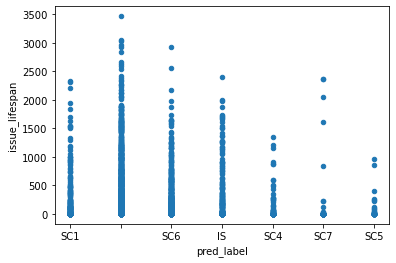

In [46]:
time_df.plot.scatter(x='pred_label', y='issue_lifespan')

<AxesSubplot:xlabel='pred_label'>

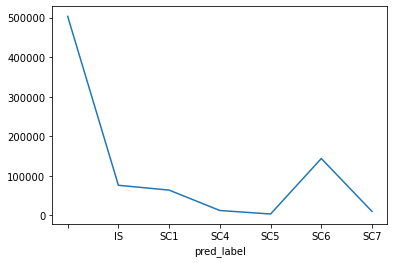

In [47]:
time_df = time_df.groupby('pred_label').sum()
time_df['issue_lifespan'].plot()

In [48]:
predictions_df = pd.read_csv(r'C:\Dana School Files\Shared Leadership Google ExploreCSR\data4.csv')
predictions_df

,Source,Target,Weight
0,rasos,thiloplanz,1
1,rasos,Stemby,1
2,thiloplanz,Stemby,1
3,davout,mgiuca,1
4,davout,Kiv,1
...,...,...,...
11473,decryp2kanon,ViralTaco,1
11474,decryp2kanon,benthecarman,1
11475,prusnak,ViralTaco,1
11476,prusnak,benthecarman,1


In [49]:
def unique_non_null(s):
    return s.dropna().unique()


predictionsCsv = pd.read_csv(r'C:\Dana School Files\Shared Leadership Google ExploreCSR\prediction_1-bitcoin_closed_comment_data_all.csv')


topTen=["sipa" , "TheBlueMatt"	,	"MarcoFalke",	"luke-jr"	,	"laanwj",	"jonasschnelli",	"gmaxwell",	"gavinandresen",	"fanquake",
        "Diapolo"]#derived from gephi. Top ten degrees

row = predictionsCsv["commenter"].unique()
col = unique_non_null(predictionsCsv["pred_label"])

devs_labels = pd.DataFrame(index=row, columns=col) #row=commenter names; col=prediction labels
for col in devs_labels.columns:#sets all values to 0; defaults to NaN without
    devs_labels[col].values[:]=0

for index, row in predictionsCsv.iterrows():#Fills table with instances of prediction labels. NaN values are avoided;
    #dropping NaN first? 2 pandas loops but may better due to pandas being 4x faster than regular python;
    #perhaps select indexes using predictionCsv's commenters then select label.Perhaps..devs_labels.loc[predCsv["commenter"],predCsv["pred_label"]]]+=1
    if pd.notna(row["pred_label"]):
        devs_labels.loc[row["commenter"], row["pred_label"]]+=1
        print(devs_labels.loc[row["commenter"]])

devs_labels.to_csv(r"C:\Dana School Files\Shared Leadership Google ExploreCSR\frequency.csv")
dev_labels_topT=devs_labels[devs_labels.index.isin(topTen)]#fitlers to get top ten
dev_labels_topT.to_csv(r"C:\Dana School Files\Shared Leadership Google ExploreCSR\frequencyTopTen.csv")

#ax = dev_labels_topT.plot.bar(rot=0)
#plt.show()

IS     1
SC6    0
SC4    0
SC7    0
SC1    0
SC5    0
Name: fanquake, dtype: object
IS     2
SC6    0
SC4    0
SC7    0
SC1    0
SC5    0
Name: fanquake, dtype: object
IS     1
SC6    0
SC4    0
SC7    0
SC1    0
SC5    0
Name: MarcoFalke, dtype: object
IS     1
SC6    1
SC4    0
SC7    0
SC1    0
SC5    0
Name: MarcoFalke, dtype: object
IS     0
SC6    0
SC4    1
SC7    0
SC1    0
SC5    0
Name: michaelfolkson, dtype: object
IS     2
SC6    1
SC4    0
SC7    0
SC1    0
SC5    0
Name: MarcoFalke, dtype: object
IS     2
SC6    1
SC4    1
SC7    0
SC1    0
SC5    0
Name: MarcoFalke, dtype: object
IS     0
SC6    0
SC4    2
SC7    0
SC1    0
SC5    0
Name: michaelfolkson, dtype: object
IS     0
SC6    0
SC4    0
SC7    1
SC1    0
SC5    0
Name: laanwj, dtype: object
IS     0
SC6    1
SC4    0
SC7    0
SC1    0
SC5    0
Name: wpeckr, dtype: object
IS     0
SC6    0
SC4    0
SC7    0
SC1    1
SC5    0
Name: sipa, dtype: object
IS     2
SC6    1
SC4    2
SC7    0
SC1    0
SC5    0
Name: Marc

In [50]:
freq_df = pd.read_csv(r'C:\Dana School Files\Shared Leadership Google ExploreCSR\frequency.csv')

In [51]:
freq_df.head()

,Unnamed: 0,IS,SC6,SC4,SC7,SC1,SC5
0,fanquake,44,87,120,105,47,7
1,MarcoFalke,152,411,179,238,77,13
2,jonatack,5,8,3,2,14,0
3,sipa,154,168,100,20,90,7
4,michaelfolkson,1,3,3,0,4,0


In [98]:
topten_df = pd.read_csv(r'C:\Dana School Files\Shared Leadership Google ExploreCSR\frequencyTopTen.csv').rename(columns = {'Unnamed: 0': 'username'})

In [97]:
topten_df

,username,IS,SC6,SC4,SC7,SC1,SC5
0,fanquake,44,87,120,105,47,7
1,MarcoFalke,152,411,179,238,77,13
2,sipa,154,168,100,20,90,7
3,laanwj,269,385,165,343,342,12
4,jonasschnelli,78,156,34,60,102,12
5,luke-jr,34,57,1,1,20,2
6,TheBlueMatt,37,78,13,5,22,2
7,gmaxwell,28,63,3,2,13,1
8,Diapolo,68,162,8,60,25,4
9,gavinandresen,30,43,10,51,26,2


In [99]:
topten_df.columns

Index(['username', 'IS', 'SC6', 'SC4', 'SC7', 'SC1', 'SC5'], dtype='object')

In [100]:
topten_df.melt(id_vars=['username'], value_vars=['IS', 'SC6', 'SC4', 'SC7', 'SC1', 'SC5'])

,username,variable,value
0,fanquake,IS,44
1,MarcoFalke,IS,152
2,sipa,IS,154
3,laanwj,IS,269
4,jonasschnelli,IS,78
5,luke-jr,IS,34
6,TheBlueMatt,IS,37
7,gmaxwell,IS,28
8,Diapolo,IS,68
9,gavinandresen,IS,30


<AxesSubplot:>

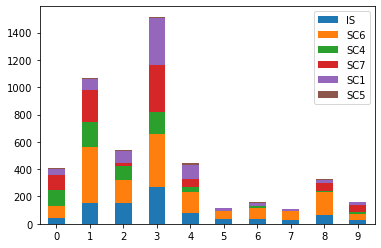

In [85]:
topten_df.plot.bar(stacked = True, rot = 0)

In [95]:
top_ten = sns.load_dataset(topten_df)

ValueError: The truth value of a DataFrame is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().